# Stroke Prediction Project

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
df = pd.read_csv(r'D:\stroke prediction project\data\archive\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [284]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [285]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [286]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data Preprocessing

In [287]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

C:\Users\Digital Lab\AppData\Local\Temp\ipykernel_2352\3594416367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [288]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [289]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [290]:
df['stroke'].count()

np.int64(5110)

In [205]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [206]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [207]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [208]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [209]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [210]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [211]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

# Data Visualiztion

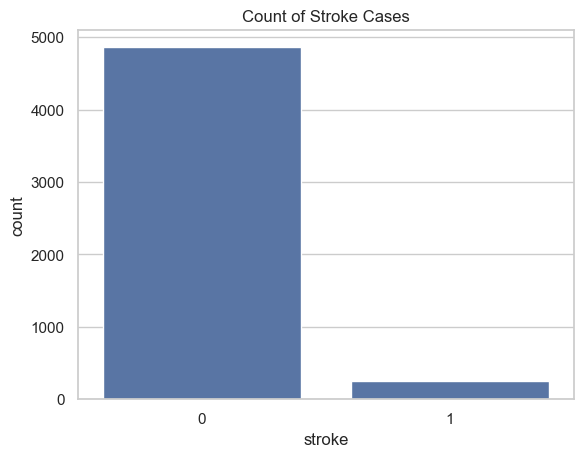

In [212]:
sns.set(style="whitegrid")
sns.countplot(x='stroke', data=df)
plt.title("Count of Stroke Cases")
plt.show()

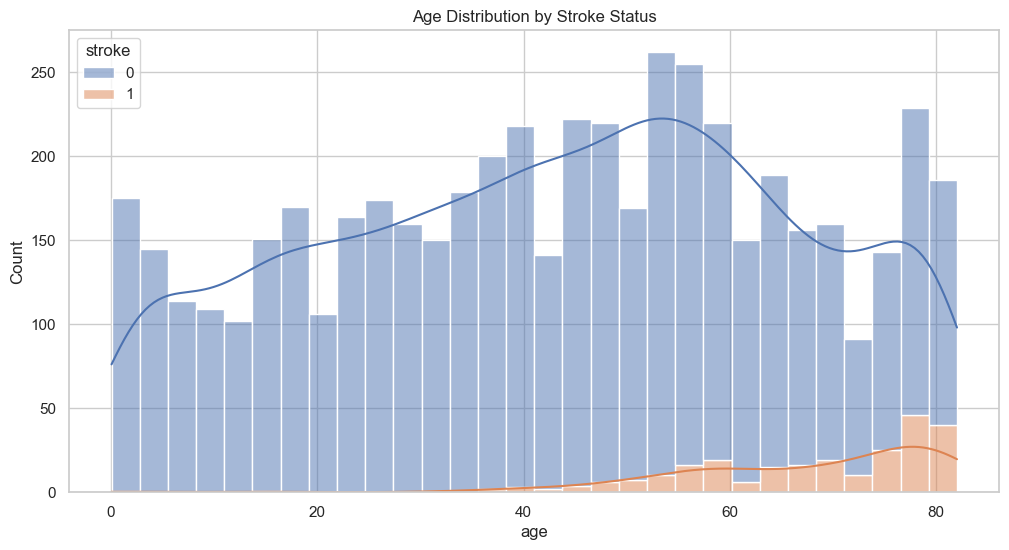

In [213]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='stroke', multiple='stack', kde=True, bins=30)
plt.title("Age Distribution by Stroke Status")
plt.show()

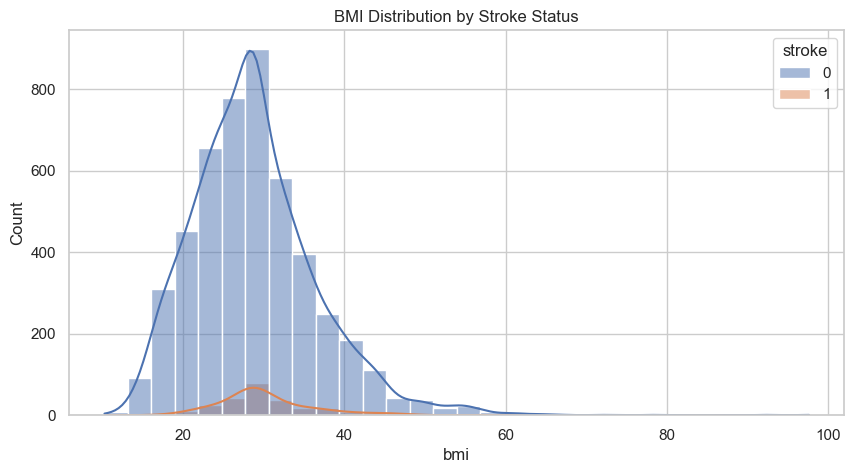

In [214]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='bmi', hue='stroke', bins=30, kde=True)
plt.title("BMI Distribution by Stroke Status")
plt.show()

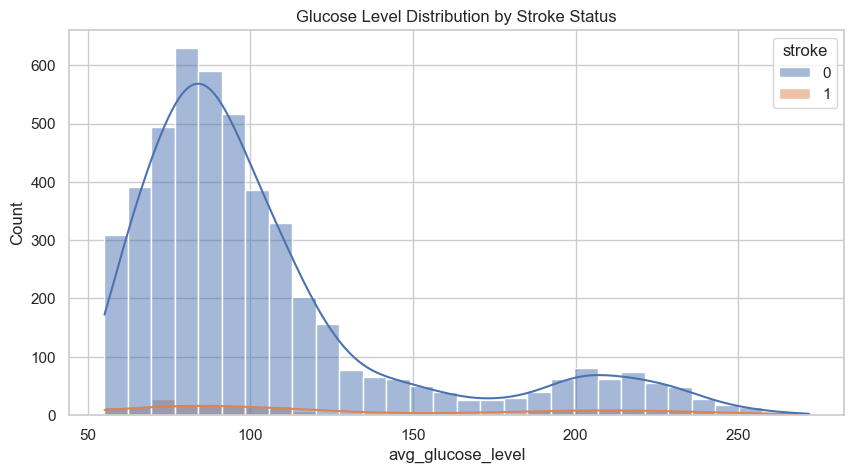

In [215]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', bins=30, kde=True)
plt.title("Glucose Level Distribution by Stroke Status")
plt.show()

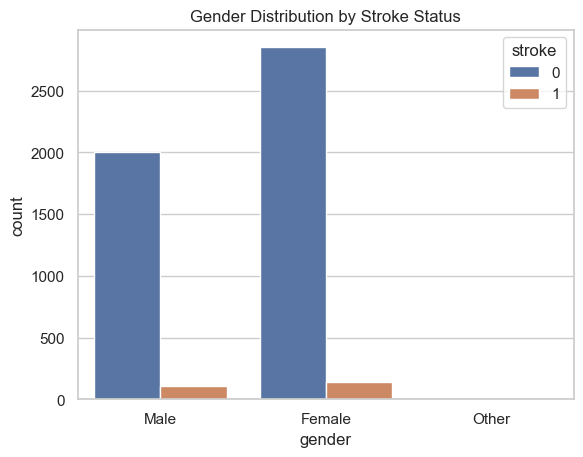

In [216]:
sns.countplot(x='gender', hue='stroke', data=df)
plt.title("Gender Distribution by Stroke Status")
plt.show()


In [217]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

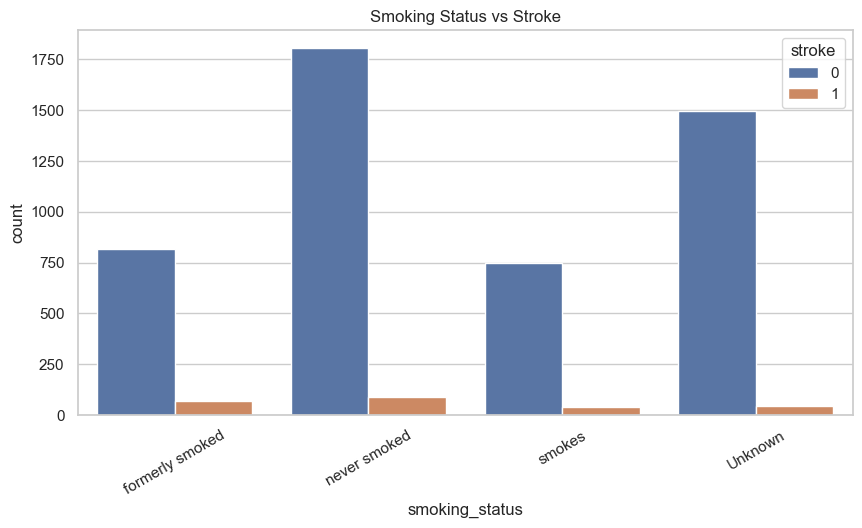

In [218]:
plt.figure(figsize=(10,5))
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title("Smoking Status vs Stroke")
plt.xticks(rotation=30)
plt.show()


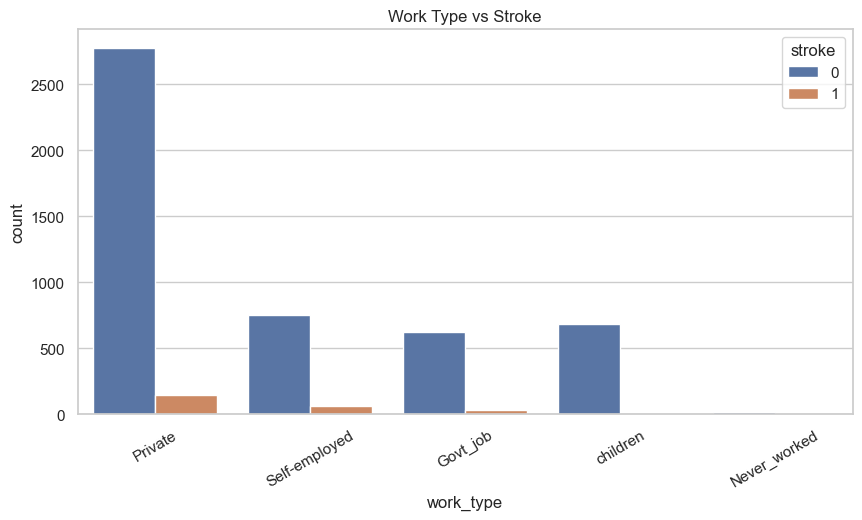

In [219]:
plt.figure(figsize=(10,5))
sns.countplot(x='work_type', hue='stroke', data=df)
plt.title("Work Type vs Stroke")
plt.xticks(rotation=30)
plt.show()

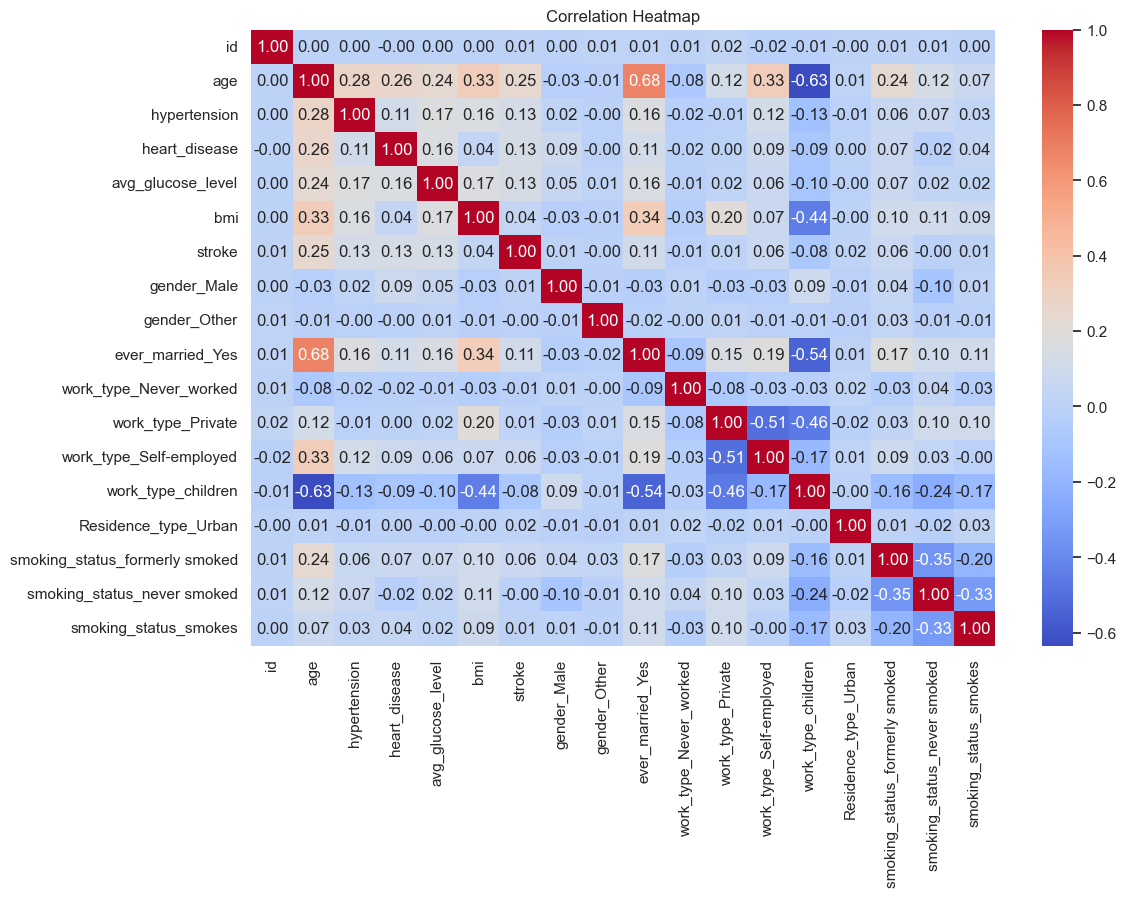

In [220]:
# Convert categorical to numerical temporarily for correlation
df_corr = df.copy()
df_corr = pd.get_dummies(df_corr, drop_first=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [221]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [222]:
df.select_dtypes(include='object').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [223]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['gender', 'ever_married','Residence_type']:
    df[col] = le.fit_transform(df[col])


In [224]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle', 'Old'])
df = pd.get_dummies(df, columns=['age_group'])

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(X[['age', 'avg_glucose_level', 'bmi']])

In [226]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [227]:
df = pd.get_dummies(df, columns=['work_type'], drop_first=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group_Young,age_group_Middle,age_group_Old,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.600000,formerly smoked,1,False,False,True,False,True,False,False
1,51676,0,61.0,0,0,1,0,202.21,28.893237,never smoked,1,False,False,True,False,False,True,False
2,31112,1,80.0,0,1,1,0,105.92,32.500000,never smoked,1,False,False,True,False,True,False,False
3,60182,0,49.0,0,0,1,1,171.23,34.400000,smokes,1,False,True,False,False,True,False,False
4,1665,0,79.0,1,0,1,0,174.12,24.000000,never smoked,1,False,False,True,False,False,True,False


In [228]:
df = pd.get_dummies(df, columns=['smoking_status'], drop_first=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group_Young,age_group_Middle,age_group_Old,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,False,False,True,False,True,False,False,True,False,False
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,True,False
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,False,False,True,False,True,False,False,False,True,False
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,False,True,False,False,True,False,False,False,False,True
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,True,False


In [229]:
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group_Young,age_group_Middle,age_group_Old,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,1,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,1,0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   gender                          5110 non-null   int64  
 2   age                             5110 non-null   float64
 3   hypertension                    5110 non-null   int64  
 4   heart_disease                   5110 non-null   int64  
 5   ever_married                    5110 non-null   int64  
 6   Residence_type                  5110 non-null   int64  
 7   avg_glucose_level               5110 non-null   float64
 8   bmi                             5110 non-null   float64
 9   stroke                          5110 non-null   int64  
 10  age_group_Young                 5110 non-null   int64  
 11  age_group_Middle                5110 non-null   int64  
 12  age_group_Old                   51

In [231]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group_Young,age_group_Middle,age_group_Old,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,1,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,1,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,1,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,1,0


In [232]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group_Young,age_group_Middle,age_group_Old,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,0.508023,106.147677,28.893237,0.048728,0.307241,0.276517,0.416243,0.004305,0.572407,0.160274,0.134442,0.173190,0.370254,0.154403
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,0.499985,45.283560,7.698018,0.215320,0.461395,0.447319,0.492983,0.065480,0.494778,0.366896,0.341160,0.378448,0.482920,0.361370
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.885000,28.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,114.090000,32.800000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [233]:
df.drop("id", axis=1, inplace=True)

In [234]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group_Young,age_group_Middle,age_group_Old,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,1,0,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.000000,1,0,0,1,0,1,0,0,1,0,0
6,1,74.0,1,1,1,0,70.09,27.400000,1,0,0,1,0,1,0,0,0,1,0
7,0,69.0,0,0,0,1,94.39,22.800000,1,0,0,1,0,1,0,0,0,1,0
8,0,59.0,0,0,1,0,76.15,28.893237,1,0,0,1,0,1,0,0,0,0,0
9,0,78.0,0,0,1,1,58.57,24.200000,1,0,0,1,0,1,0,0,0,0,0


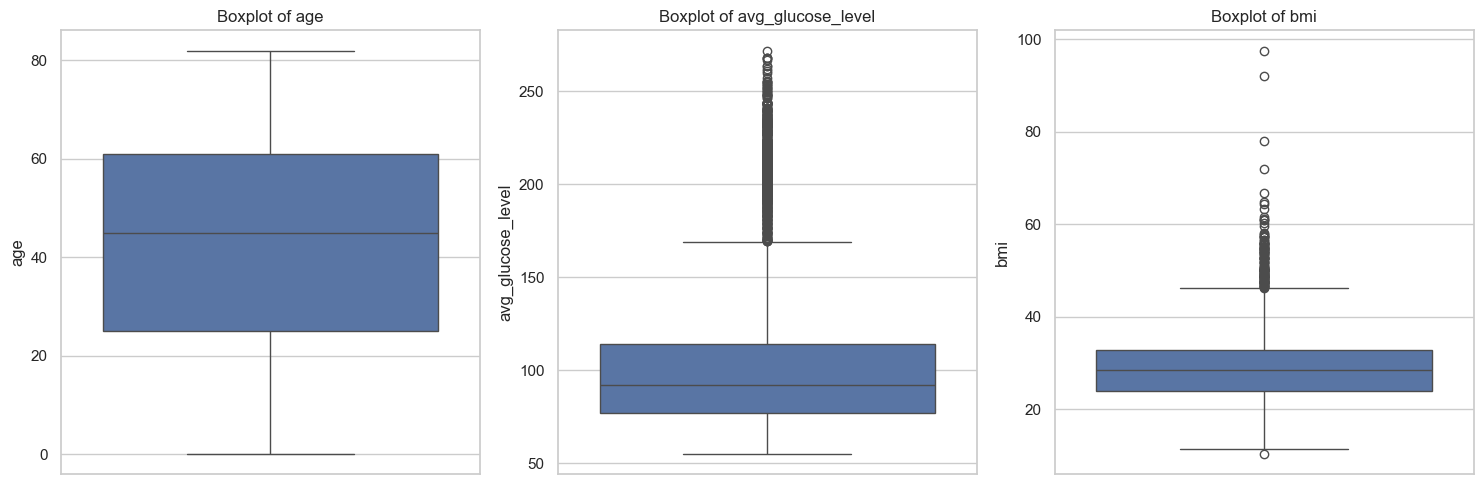

In [235]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


# Applying the ML Models

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [237]:
# Features and target

X = df.drop('stroke', axis=1)
y = df['stroke']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [238]:
# Apply SMOTE to balance only the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.1, random_state=42)  # 50% Stroke samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

d:\miniconda\envs\ecf_pjm\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [239]:
print(pd.Series(y_train_resampled).value_counts())

stroke
0    3889
1     388
Name: count, dtype: int64


# 1. Decision Tree Classifier

In [259]:
# Apply SMOTE to balance only the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% Stroke samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

d:\miniconda\envs\ecf_pjm\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Decision Tree Classifier Results

Accuracy Score: 90.12%

Confusion Matrix:
[[910  62]
 [ 39  11]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       972
           1       0.15      0.22      0.18        50

    accuracy                           0.90      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.92      0.90      0.91      1022



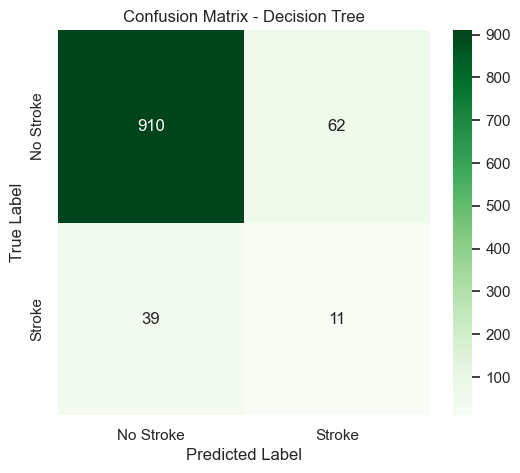

In [ ]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(
    class_weight={0: 1.0, 1: 20.0},  # Higher weight for Stroke
    max_depth=None,  # Limit depth to prevent overfitting
    min_samples_split=2,
    random_state=42
)
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions with threshold tuning
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
threshold = 0.3 # Lower threshold to improve recall
y_pred_dt = (y_pred_proba >= threshold).astype(int)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, digits=2)

# Print results
print("Decision Tree Classifier Results\n")
print(f"Accuracy Score: {accuracy_dt:.2f}%\n")
print("Confusion Matrix:")
print(conf_matrix_dt, "\n")
print("Classification Report:")
print(report_dt)

# Plot confusion matrix
labels = ['No Stroke', 'Stroke']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")  
plt.show()

In [263]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': [{0: 1.0, 1: 15.0}, {0: 1.0, 1: 20.0}]
}
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)
dt_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'class_weight': {0: 1.0, 1: 20.0}, 'max_depth': None, 'min_samples_split': 2}


In [241]:
import numpy as np
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(3889), np.int64(1): np.int64(1166)}


# 2. Random Forest Classifier

In [242]:
# Apply SMOTE to balance only the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)  # 50% Stroke samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

d:\miniconda\envs\ecf_pjm\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Random Forest Classifier Results

Accuracy Score: 80.33%

Confusion Matrix:
[[791 181]
 [ 20  30]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       972
           1       0.14      0.60      0.23        50

    accuracy                           0.80      1022
   macro avg       0.56      0.71      0.56      1022
weighted avg       0.93      0.80      0.86      1022



d:\miniconda\envs\ecf_pjm\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


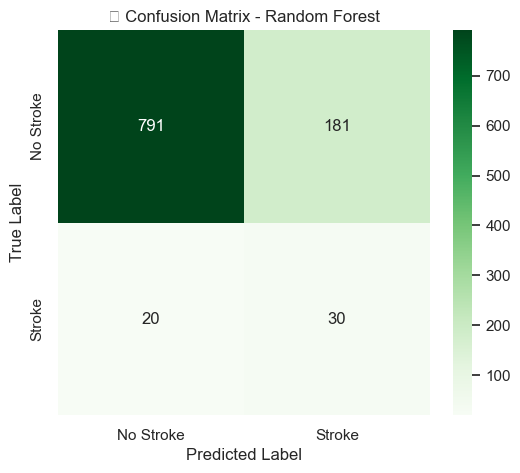

In [243]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Step 1: Train the Random Forest model on resampled training data
class_weights = {0: 1.0, 1: 20.0} 
rf_model = RandomForestClassifier(class_weight=class_weights,  # Higher weight
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Step 2:# Make predictions with threshold tuning
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.3 # Lower threshold to improve recall
y_pred_rf = (y_pred_proba >= threshold).astype(int)

# Step 3: Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, digits=2)

# Step 4: Print results
print("Random Forest Classifier Results\n")
print(f"Accuracy Score: {accuracy_rf:.2f}%\n")

print("Confusion Matrix:")
print(conf_matrix_rf, "\n")

print("Classification Report:")
print(report_rf)

# Step 5: Plot the confusion matrix
labels = ['No Stroke', 'Stroke']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("📊 Confusion Matrix - Random Forest")
plt.show()


# 3. XGBoost Classifier

In [278]:
# # Apply SMOTE to balance only the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # 50% Stroke samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

d:\miniconda\envs\ecf_pjm\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


XGBoost Classifier Results:

Accuracy Score: 86.20%

Confusion Matrix:
[[867 105]
 [ 36  14]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       972
           1       0.12      0.28      0.17        50

    accuracy                           0.86      1022
   macro avg       0.54      0.59      0.55      1022
weighted avg       0.92      0.86      0.89      1022



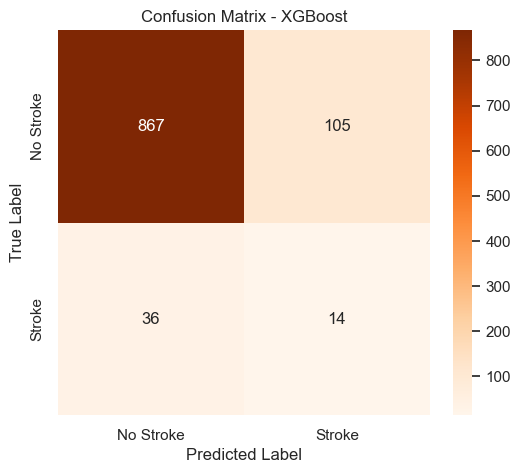

In [280]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create and train the model
xgb_model = XGBClassifier(scale_pos_weight=25,
    n_estimators=200,
    max_depth=6,  # Reduced to prevent overfitting
    eval_metric='logloss',
    random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 2: Make predictions with threshold tuning
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.2
y_pred_xgb = (y_pred_proba >= threshold).astype(int)

# Step 3: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, digits=2)

# Step 4: Print Results
print("XGBoost Classifier Results:\n")
print(f"Accuracy Score: {accuracy_xgb:.2f}%\n")

print("Confusion Matrix:")
print(conf_matrix_xgb, "\n")

print("Classification Report:")
print(report_xgb)

# Step 5: Plot Confusion Matrix
labels = ['No Stroke', 'Stroke']
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [267]:
importances = xgb_model.feature_importances_
feature_names = X.columns
for name, imp in zip(feature_names, importances):
    print(f"{name}: {imp:.4f}")

gender: 0.0412
age: 0.1028
hypertension: 0.0191
heart_disease: 0.0406
ever_married: 0.0562
Residence_type: 0.0287
avg_glucose_level: 0.0289
bmi: 0.0268
age_group_Young: 0.0703
age_group_Middle: 0.1669
age_group_Old: 0.0584
work_type_Never_worked: 0.0000
work_type_Private: 0.0594
work_type_Self-employed: 0.0807
work_type_children: 0.0000
smoking_status_formerly smoked: 0.0691
smoking_status_never smoked: 0.0783
smoking_status_smokes: 0.0727


In [275]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 9],
    'scale_pos_weight': [10, 20, 30]
}
grid_search = GridSearchCV(
    XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
grid_search.fit(X_train_resampled, y_train_resampled)
xgb_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 9, 'n_estimators': 200, 'scale_pos_weight': 10}
